In [3]:
# On Unix you could use wget to download the fasta file (just uncomment the following line)
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq

# On Windows you have to download the file manually into your working directory

--2024-11-11 14:26:24--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 3.163.78.194, 3.163.78.207, 3.163.78.34, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|3.163.78.194|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224786 (220K) [application/octet-stream]
Saving to: ‘SRR835775_1.first1000.fastq.1’

SRR835775_1.first10 100%[===================>] 219.52K  --.-KB/s    in 0.04s   

2024-11-11 14:26:24 (5.37 MB/s) - ‘SRR835775_1.first1000.fastq.1’ saved [224786/224786]



In [35]:
def readFastq(filename):
    """ Reads a fastq file and returns a list of sequences and a list of qualities
        param filename: valid filename
        return sequences, qualities
    """
    sequences = []
    qualities = []
    index = 1

    with open(filename) as fh:
        line = fh.readline()
        while line:

          if(index % 4 == 2):

            for i in range(len(line)):
              sequences.append(line[i])

          elif(index % 4 == 0):

            for i in range(len(line)):
              qualities.append(line[i])


          index += 1
          line = fh.readline()


    sequences.pop(-1) # oder mit line.strip()
    qualities.pop(-1)


    return sequences, qualities
seqs, quals = readFastq('SRR835775_1.first1000.fastq')
print(quals)

['?', '?', '?', 'B', '1', 'A', 'D', 'D', 'D', '8', '?', '?', 'B', 'B', '+', 'C', '?', 'B', '+', ':', 'A', 'A', '8', '8', '3', 'C', 'E', 'E', '8', '?', 'C', '3', '@', 'D', 'D', 'D', '3', ')', '?', 'D', '2', ';', 'D', 'C', '?', '8', '?', '=', 'B', 'A', 'D', '=', '@', 'C', '@', '(', '.', '6', '.', '6', '=', 'A', '?', '=', '?', '@', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '\n', 'C', 'C', 'C', 'F', 'F', 'F', 'F', 'F', 'G', 'H', 'H', 'G', 'H', 'J', 'J', 'J', 'J', 'J', 'I', 'J', 'G', 'I', 'I', 'J', 'J', 'J', 'J', 'J', 'J', 'J', 'I', 'J', 'I', 'J', 'J', 'J', 'J', 'J', 'F', 'J', 'J', 'F', 'G', 'I', 'I', 'I', 'I', 'H', '=', 'C', 'B', 'F', 'C', 'F', '=', 'C', 'C', 'E', 'G', ')', '=', '>', 'E', 'H', 'B', '2', '@', '@', 'D', 'E', 'C', '>', ';', ';', '?', '=', ';', '(', '=', '?', 'B', 'B', 'D', '?', '5', '9', '?', 'B', 'A', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#'

In [34]:
def phred33ToQ(qual):
    """ Converts quality to int
    """
    return ord(qual) - 33

phred33ToQ('A')

32

In [37]:
def createHist(qualityStrings):
    """ Creates a historgram of qualities
        param qualityStrings: list of qualities
        return: numbers of occurences of each quality"""
    # Create a histogram of quality scores (max of 50)
    hist = [0]*50
    qualityInt = []
    # your code here
    for quality_string in qualityStrings:
      qualityInt.append(phred33ToQ(quality_string))

    print(qualityInt)

    for quality_int in range(len(qualityStrings)):
      if(qualityInt[quality_int] > 0 and qualityInt[quality_int] < 51):
        hist[qualityInt[quality_int]] += 1

    return hist
h = createHist(quals)
print(h)

[30, 30, 30, 33, 16, 32, 35, 35, 35, 23, 30, 30, 33, 33, 10, 34, 30, 33, 10, 25, 32, 32, 23, 23, 18, 34, 36, 36, 23, 30, 34, 18, 31, 35, 35, 35, 18, 8, 30, 35, 17, 26, 35, 34, 30, 23, 30, 28, 33, 32, 35, 28, 31, 34, 31, 7, 13, 21, 13, 21, 28, 32, 30, 28, 30, 31, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, -23, 34, 34, 34, 37, 37, 37, 37, 37, 38, 39, 39, 38, 39, 41, 41, 41, 41, 41, 40, 41, 38, 40, 40, 41, 41, 41, 41, 41, 41, 41, 40, 41, 40, 41, 41, 41, 41, 41, 37, 41, 41, 37, 38, 40, 40, 40, 40, 39, 28, 34, 33, 37, 34, 37, 28, 34, 34, 36, 38, 8, 28, 29, 36, 39, 33, 17, 31, 31, 35, 36, 34, 29, 26, 26, 30, 28, 26, 7, 28, 30, 33, 33, 35, 30, 20, 24, 30, 33, 32, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, -23, 31, 31, 27, 35, 35, 30, 35, 35, 39, 39, 39, 27, 34, 33, 39, 40, 40, 25, 34, 37, 38, 40, 38, 32, 38, 39, 40, 40, 38, 30, 34, 34, 38, 38, 36, 15, 33, 35, 39, 40, 40, 39, 40, 38, 40, 34, 39, 23, 28, 37, 39, 38, 40, 28, 31, 36, 39, 38, 38, 38

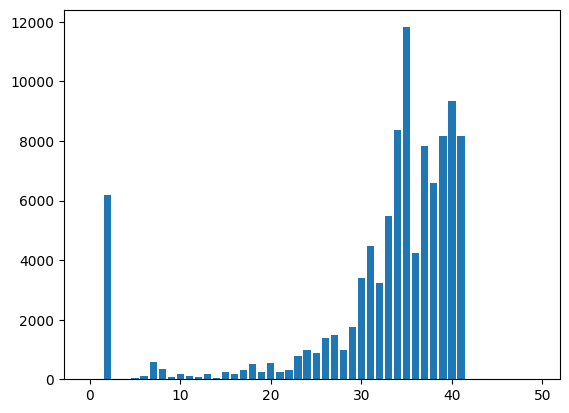

In [38]:
# Plot the histogram
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(h)), h)
plt.show()

In [39]:
import unittest
class TestNotebook(unittest.TestCase):
    def test_notebook(self):
        self.assertEqual(h, [0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0])


unittest.main(argv=[''], verbosity=2, exit=False)

test_notebook (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.006s

OK
